In [14]:
import face_recognition as fr
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [15]:
path = "./train/"
known_names = []
known_name_encodings = []
images = os.listdir(path)

In [16]:
for _ in images:
    image = fr.load_image_file(path + _)
    image_path = path + _
    encoding = fr.face_encodings(image)[0]
    known_name_encodings.append(encoding)
    known_names.append(os.path.splitext(os.path.basename(image_path))[0].capitalize())

In [29]:
test_image = "./test/test2.jpg"
image = cv2.imread(test_image)

In [30]:
face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)

In [31]:
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = fr.compare_faces(known_name_encodings, face_encoding)
    name = ""

    face_distances = fr.face_distance(known_name_encodings, face_encoding)
    best_match = np.argmin(face_distances)

    if matches[best_match]:
           name = known_names[best_match]

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)

    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

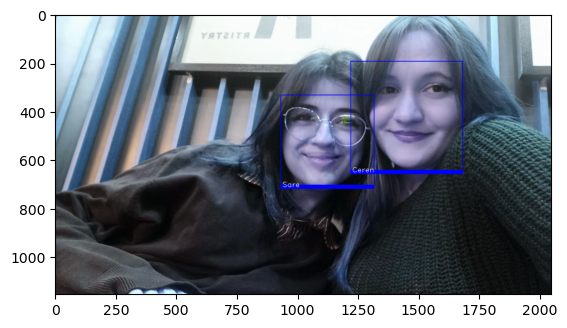

In [32]:
plt.imshow(image)

In [ ]:
#cv2.waitKey(0)
#cv2.destroyAllWindows()